In [1]:
import pandas as pd
import numpy as  np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pickle
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
import sklearn.datasets as skds
from pathlib import Path
import itertools
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [2]:
train_users = pd.read_csv("train_users_2.csv")
test_users = pd.read_csv("test_users.csv")


In [3]:
print("There were", train_users.shape[0], "users in the training set and", test_users.shape[0], "users in the test set.") 
print("In total there were",train_users.shape[0] + test_users.shape[0], "users in total." )

There were 213451 users in the training set and 62096 users in the test set.
In total there were 275547 users in total.


In [4]:
df = pd.concat((train_users, test_users), axis = 0, ignore_index = True, sort = True)


In [5]:
df.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,6/28/10,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2.009030e+13
1,seo,google,38.0,NDF,5/25/11,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2.009050e+13
2,direct,direct,56.0,US,9/28/10,8/2/10,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2.009060e+13
3,direct,direct,42.0,other,12/5/11,9/8/12,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2.009100e+13
4,direct,direct,41.0,US,9/14/10,2/18/10,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2.009120e+13


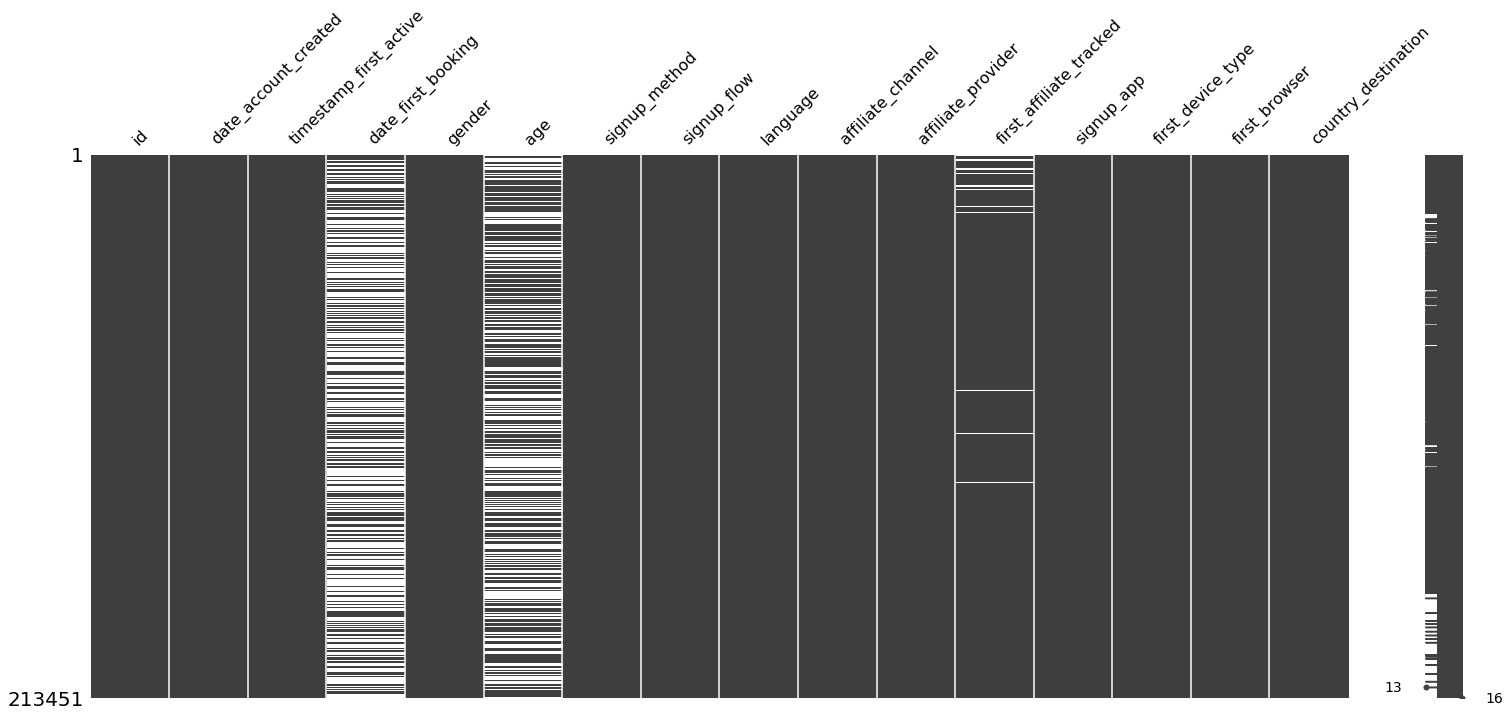

In [6]:
import missingno as msno
msno.matrix(train_users)


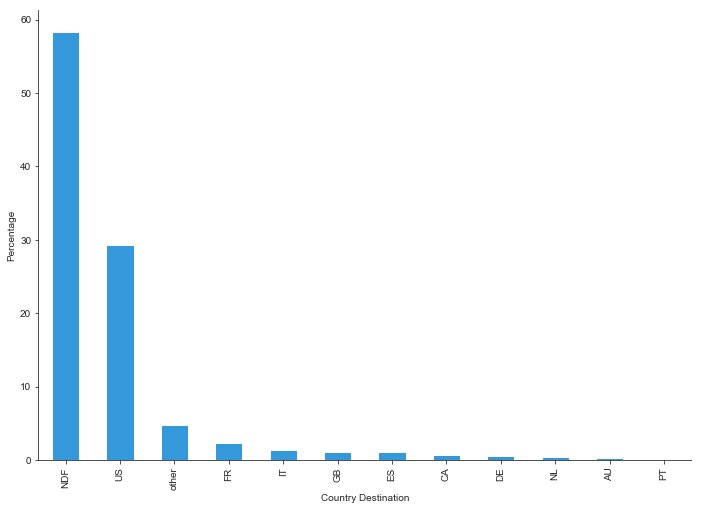

In [7]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
dest_per = train_users.country_destination.value_counts() / train_users.shape[0] * 100
dest_per.plot(kind='bar',color='#3498DB')
plt.xlabel('Country Destination')
plt.ylabel('Percentage')
sns.despine()

In [8]:
df['gender'].value_counts()


-unknown-    129480
FEMALE        77524
MALE          68209
OTHER           334
Name: gender, dtype: int64

In [9]:

df['first_browser'].value_counts()

Chrome                  78671
Safari                  53302
-unknown-               44394
Firefox                 38665
Mobile Safari           29636
IE                      24744
Chrome Mobile            3186
Android Browser          1577
AOL Explorer              254
Opera                     228
Silk                      172
IE Mobile                 118
BlackBerry Browser         89
Chromium                   83
Mobile Firefox             64
Maxthon                    60
Apple Mail                 45
Sogou Explorer             43
SiteKiosk                  27
Iron                       24
RockMelt                   24
Yandex.Browser             14
IceWeasel                  14
Pale Moon                  13
CometBird                  12
SeaMonkey                  12
Camino                      9
TenFourFox                  8
Opera Mini                  8
wOSBrowser                  7
CoolNovo                    6
Avant Browser               4
Opera Mobile                4
Mozilla   

In [10]:
df['age'] = df['age'].fillna((df['age'].median()))

In [11]:
df.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,33.0,NDF,6/28/10,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,2.009030e+13
1,seo,google,38.0,NDF,5/25/11,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,2.009050e+13
2,direct,direct,56.0,US,9/28/10,8/2/10,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,2.009060e+13
3,direct,direct,42.0,other,12/5/11,9/8/12,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,2.009100e+13
4,direct,direct,41.0,US,9/14/10,2/18/10,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,2.009120e+13


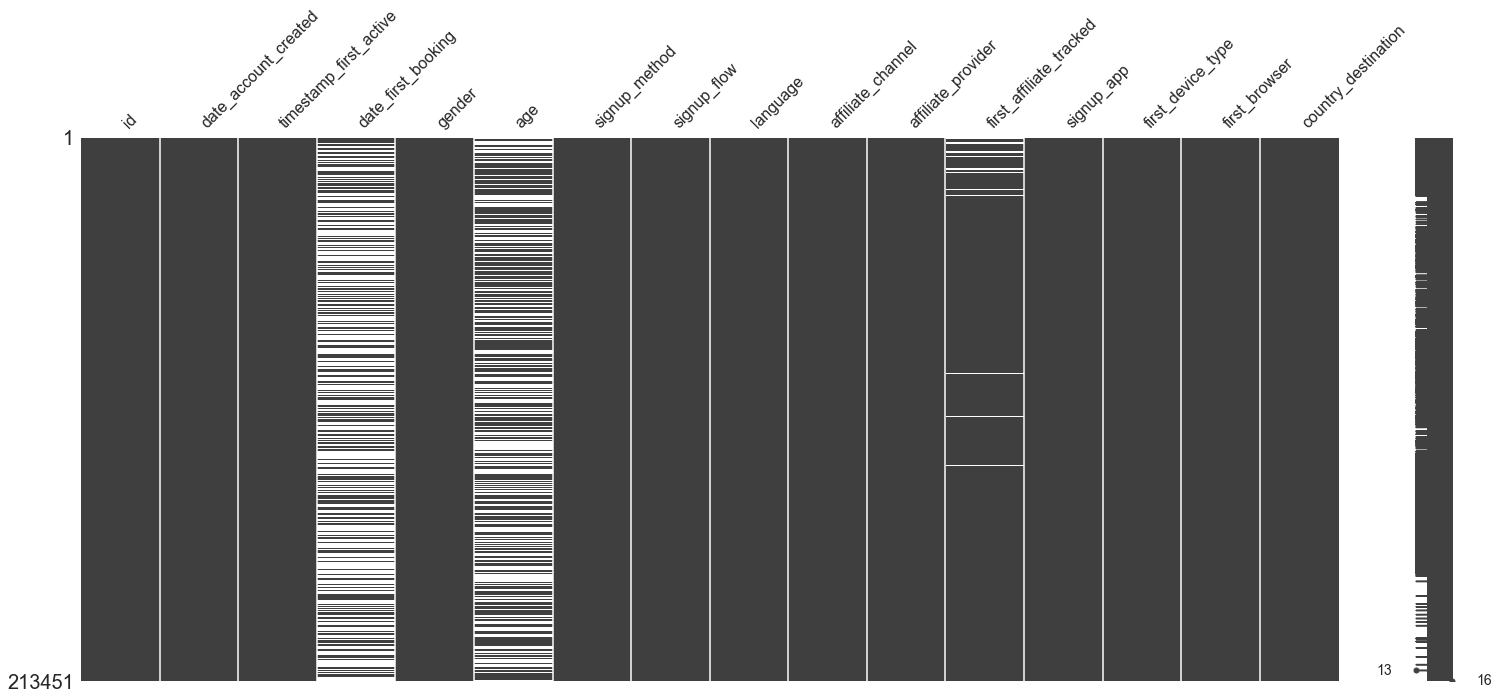

In [12]:
import missingno as msno
msno.matrix(train_users)

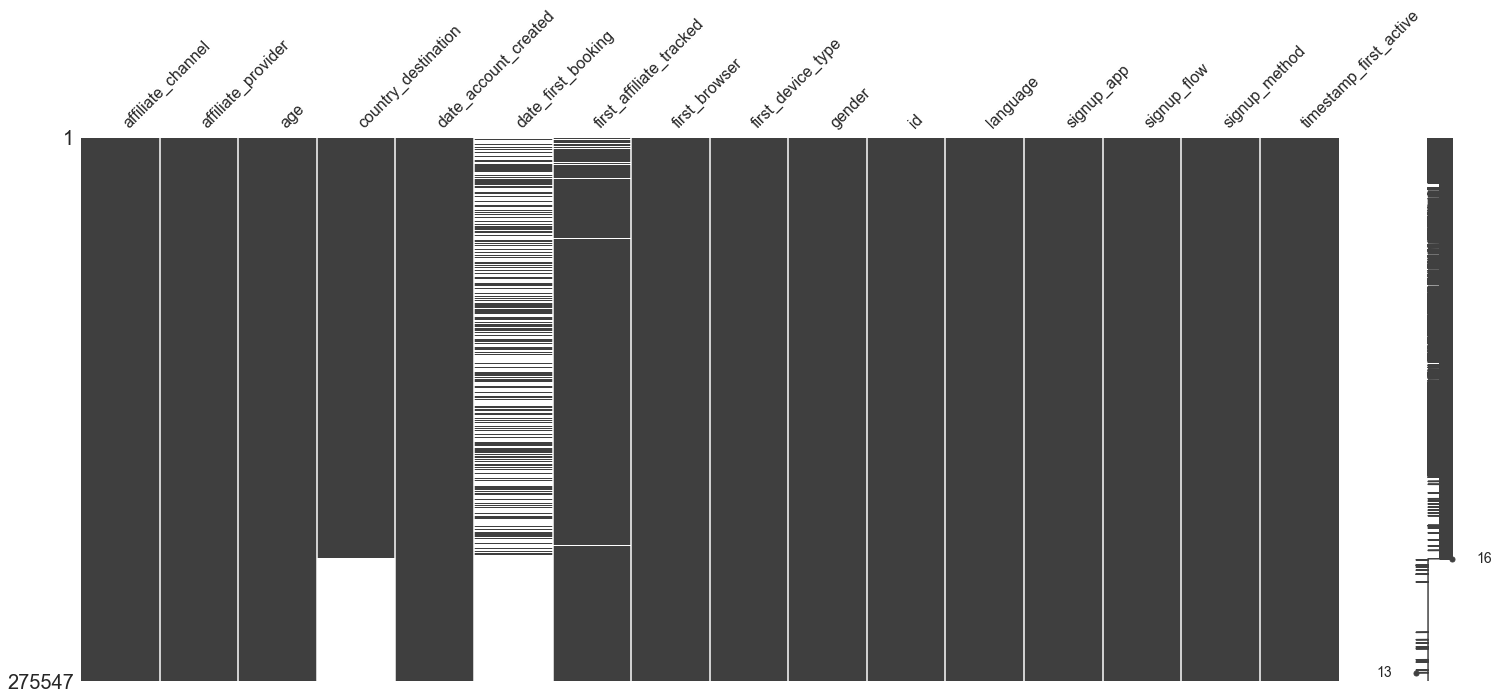

In [13]:
import missingno as msno
msno.matrix(df)

In [14]:
df.isnull()


,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.isnull().sum()

affiliate_channel               0
affiliate_provider              0
age                             0
country_destination         62096
date_account_created            0
date_first_booking         186639
first_affiliate_tracked      6085
first_browser                   0
first_device_type               0
gender                          0
id                              0
language                        0
signup_app                      0
signup_flow                     0
signup_method                   0
timestamp_first_active          0
dtype: int64

In [16]:
df=df.drop('date_first_booking',1)

In [17]:
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer
df_label = df.loc[:,'country_destination']
data = df.drop(['country_destination'], axis=1)

In [18]:
# Replacing unknown values in gender with -1 and null values with -1
df.loc[ df['gender'] == '-unknown-', 'gender'] = -1
df.loc[ df['gender'].isnull(), 'gender' ] = -1

In [19]:
# Encoding Female with 0, Male with 1 and Other with 2 in both test and train data
gender_translation = {'FEMALE' : 0,
                     'MALE' : 1,
                     'OTHER' : 2,
                     -1 : -1 }
for data in [df]:
    data['gender'] = data['gender'].apply(lambda x: gender_translation[x])

In [20]:
df.describe()

,age,gender,signup_flow,timestamp_first_active
count,275547.000000,275547.000000,275547.000000,2.755470e+05
mean,41.145950,-0.219937,4.291965,2.013308e+13
std,108.461915,0.820927,8.794313,9.149459e+09
min,1.000000,-1.000000,0.000000,2.009030e+13
25%,32.000000,-1.000000,0.000000,2.013040e+13
50%,33.000000,0.000000,0.000000,2.014010e+13
75%,35.000000,0.000000,1.000000,2.014060e+13
max,2014.000000,2.000000,25.000000,2.014093e+13


In [21]:
# Encoding the signup method for test
signup_translation = {'facebook' : 0,
                     'google' : 1,
                     'basic' : 2,
                     'weibo' : 3}
for data in [df]:
    data['signup_method'] = data['signup_method'].apply(lambda x: signup_translation[x])

In [22]:
df.describe()


,age,gender,signup_flow,signup_method,timestamp_first_active
count,275547.000000,275547.000000,275547.000000,275547.000000,2.755470e+05
mean,41.145950,-0.219937,4.291965,1.447851,2.013308e+13
std,108.461915,0.820927,8.794313,0.889289,9.149459e+09
min,1.000000,-1.000000,0.000000,0.000000,2.009030e+13
25%,32.000000,-1.000000,0.000000,0.000000,2.013040e+13
50%,33.000000,0.000000,0.000000,2.000000,2.014010e+13
75%,35.000000,0.000000,1.000000,2.000000,2.014060e+13
max,2014.000000,2.000000,25.000000,3.000000,2.014093e+13


In [23]:
df['language'] = df['language'].astype('category')
df['language'] = df['language'].cat.codes

In [24]:
df['language'].value_counts()



6     265538
25      2634
9       1508
7       1174
16      1116
4        977
14       633
21       508
15       345
20       322
22       176
17       134
24        92
3         75
19        75
18        51
2         49
5         30
23        28
11        25
12        23
8         20
1          6
13         5
10         2
0          1
Name: language, dtype: int64

In [25]:
# Encoding for affiliate_channel
df['affiliate_channel'] = df['affiliate_channel'].astype('category')
df['affiliate_channel'] = df['affiliate_channel'].cat.codes

In [26]:
# Encoding for affiliate_provider
affiliate_provider_encoding = {'direct':1,
'google':2,
'other':3,
'craigslist':4,
'bing':5,
'facebook':6,
'vast':7,
'padmapper':8,
'facebook-open-graph':9,
'yahoo':10,
'gsp':11,
'meetup':12,
'email-marketing':13,
'naver':14,
'baidu':15,
'yandex':16,
'wayn':17,
'daum':18}

for data in [df]:
    data['affiliate_provider'] = data['affiliate_provider'].apply(lambda x: affiliate_provider_encoding[x])

In [27]:
# Encoding for first_affiliate_tracked
df['first_affiliate_tracked'] = df['first_affiliate_tracked'].astype('category')
df['first_affiliate_tracked'] = df['first_affiliate_tracked'].cat.codes

In [28]:
df.describe()

,affiliate_channel,affiliate_provider,age,first_affiliate_tracked,gender,language,signup_flow,signup_method,timestamp_first_active
count,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,2.755470e+05
mean,2.918384,1.624318,41.145950,3.850145,-0.219937,6.337928,4.291965,1.447851,2.013308e+13
std,1.732641,1.365032,108.461915,2.538022,0.820927,2.268676,8.794313,0.889289,9.149459e+09
min,0.000000,1.000000,1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,2.009030e+13
25%,2.000000,1.000000,32.000000,3.000000,-1.000000,6.000000,0.000000,0.000000,2.013040e+13
50%,2.000000,1.000000,33.000000,6.000000,0.000000,6.000000,0.000000,2.000000,2.014010e+13
75%,5.000000,2.000000,35.000000,6.000000,0.000000,6.000000,1.000000,2.000000,2.014060e+13
max,7.000000,18.000000,2014.000000,6.000000,2.000000,25.000000,25.000000,3.000000,2.014093e+13


In [29]:
df['first_affiliate_tracked'].head()

0    6
1    6
2    6
3    6
4    6
Name: first_affiliate_tracked, dtype: int8

In [30]:
df['first_affiliate_tracked']

0         6
1         6
2         6
3         6
4         6
5         3
6         6
7         3
8         6
9         3
10        6
11        6
12       -1
13        0
14        6
15        6
16       -1
17       -1
18       -1
19        6
20       -1
21        0
22        6
23        6
24        6
25        6
26        6
27        6
28       -1
29        6
         ..
275517    6
275518    6
275519    6
275520    6
275521    6
275522    6
275523    6
275524    6
275525    0
275526    3
275527    6
275528    6
275529    6
275530    0
275531    0
275532    6
275533    6
275534    6
275535    6
275536    0
275537    6
275538    3
275539    6
275540    0
275541    0
275542    6
275543    6
275544    0
275545    3
275546    5
Name: first_affiliate_tracked, Length: 275547, dtype: int8

In [31]:
# Encoding for signup_app
signup_app_encoding = {'Web' : 1,
                      'iOS' : 2,
                      'Android' : 3,
                      'Moweb' : 4}
for data in [df]:
    data['signup_app'] = data['signup_app'].apply(lambda x: signup_app_encoding[x])

In [32]:
# Encoding for first_device_type
df['first_device_type'] = df['first_device_type'].astype('category')
df['first_device_type'] = df['first_device_type'].cat.codes

In [33]:
# Encoding for first_browser
first_browser_encoding = {'Chrome':1,
'Safari':2,
'Firefox':3,
'-unknown-':4,
'IE':5,
'Mobile Safari':6,
'Chrome Mobile':7,
'Android Browser':8,
'AOL Explorer':9,
'Opera':10,
'Silk':11,
'Chromium':12,
'BlackBerry Browser':13,
'Maxthon':14,
'IE Mobile':15,
'Apple Mail':16,
'Sogou Explorer':17,
'Mobile Firefox':18,
'RockMelt':19,
'SiteKiosk':20,
'Iron':21,
'IceWeasel':22,
'Pale Moon':23,
'SeaMonkey':24,
'Yandex.Browser':25,
'CometBird':26,
'Camino':27,
'TenFourFox':28,
'wOSBrowser':29,
'CoolNovo':30,
'Avant Browser':31,
'Opera Mini':32,
'Mozilla':33,
'Comodo Dragon':34,
'TheWorld Browser':35,
'Crazy Browser':36,
'Flock':37,
'OmniWeb':38,
'SlimBrowser':39,
'Opera Mobile':40,
'Conkeror':41,
'Outlook 2007':42,
'Palm Pre web browser':43,
'Stainless':44,
'NetNewsWire':45,
'Kindle Browser':46,
'Epic':47,
'Googlebot':48,
'Arora':49,
'Google Earth':50,
'IceDragon':51,
'PS Vita browser':52,
'IBrowse' : 53,
'UC Browser' : 54,
'IBrowse': 55,
'Nintendo Browser' : 56}

for data in [df]:
    data['first_browser'] = data['first_browser'].apply(lambda x: first_browser_encoding[x])
                        

In [34]:
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn import tree
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import make_scorer
df_label = df.loc[:,'country_destination']
data = df.drop(['country_destination'], axis=1)

In [35]:
df.describe()
df_label = df.loc[:,'country_destination']

In [36]:
df['country_destination'].head()

0      NDF
1      NDF
2       US
3    other
4       US
Name: country_destination, dtype: object

In [37]:
df['first_browser']

0         1
1         1
2         5
3         3
4         1
5         1
6         2
7         2
8         2
9         3
10        3
11        4
12        4
13        3
14        6
15        1
16        4
17        4
18        4
19        1
20        4
21        1
22        4
23        2
24        3
25        1
26        4
27        1
28        4
29        4
         ..
275517    4
275518    2
275519    3
275520    4
275521    6
275522    7
275523    4
275524    4
275525    6
275526    3
275527    6
275528    3
275529    6
275530    1
275531    3
275532    4
275533    2
275534    4
275535    3
275536    6
275537    4
275538    3
275539    1
275540    1
275541    1
275542    5
275543    4
275544    3
275545    2
275546    1
Name: first_browser, Length: 275547, dtype: int64

In [38]:
data = df.drop(['country_destination'], axis=1)

In [39]:
data = df.drop(['id'], axis=1)
data.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,2,1,33.0,NDF,6/28/10,6,1,3,-1,6,1,0,0,2.009030e+13
1,7,2,38.0,NDF,5/25/11,6,1,3,1,6,1,0,0,2.009050e+13
2,2,1,56.0,US,9/28/10,6,5,6,0,6,1,3,2,2.009060e+13
3,2,1,42.0,other,12/5/11,6,3,3,0,6,1,0,0,2.009100e+13
4,2,1,41.0,US,9/14/10,6,1,3,-1,6,1,0,2,2.009120e+13


In [40]:
df.dtypes


affiliate_channel             int8
affiliate_provider           int64
age                        float64
country_destination         object
date_account_created        object
first_affiliate_tracked       int8
first_browser                int64
first_device_type             int8
gender                       int64
id                          object
language                      int8
signup_app                   int64
signup_flow                  int64
signup_method                int64
timestamp_first_active     float64
dtype: object

In [41]:
df.describe()

,affiliate_channel,affiliate_provider,age,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
count,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,275547.000000,2.755470e+05
mean,2.918384,1.624318,41.145950,3.850145,3.029723,4.849158,-0.219937,6.337928,1.316396,4.291965,1.447851,2.013308e+13
std,1.732641,1.365032,108.461915,2.538022,1.999886,2.113824,0.820927,2.268676,0.722252,8.794313,0.889289,9.149459e+09
min,0.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,2.009030e+13
25%,2.000000,1.000000,32.000000,3.000000,1.000000,3.000000,-1.000000,6.000000,1.000000,0.000000,0.000000,2.013040e+13
50%,2.000000,1.000000,33.000000,6.000000,3.000000,6.000000,0.000000,6.000000,1.000000,0.000000,2.000000,2.014010e+13
75%,5.000000,2.000000,35.000000,6.000000,4.000000,6.000000,0.000000,6.000000,1.000000,1.000000,2.000000,2.014060e+13
max,7.000000,18.000000,2014.000000,6.000000,56.000000,8.000000,2.000000,25.000000,4.000000,25.000000,3.000000,2.014093e+13


In [42]:
#Seperating Labels and attributes

df_label = df.loc[:,'country_destination']
data = df.drop(['country_destination'], axis=1)

In [43]:
data.head()


,affiliate_channel,affiliate_provider,age,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,2,1,33.0,6/28/10,6,1,3,-1,gxn3p5htnn,6,1,0,0,2.009030e+13
1,7,2,38.0,5/25/11,6,1,3,1,820tgsjxq7,6,1,0,0,2.009050e+13
2,2,1,56.0,9/28/10,6,5,6,0,4ft3gnwmtx,6,1,3,2,2.009060e+13
3,2,1,42.0,12/5/11,6,3,3,0,bjjt8pjhuk,6,1,0,0,2.009100e+13
4,2,1,41.0,9/14/10,6,1,3,-1,87mebub9p4,6,1,0,2,2.009120e+13


In [44]:
data.head()

,affiliate_channel,affiliate_provider,age,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,2,1,33.0,6/28/10,6,1,3,-1,gxn3p5htnn,6,1,0,0,2.009030e+13
1,7,2,38.0,5/25/11,6,1,3,1,820tgsjxq7,6,1,0,0,2.009050e+13
2,2,1,56.0,9/28/10,6,5,6,0,4ft3gnwmtx,6,1,3,2,2.009060e+13
3,2,1,42.0,12/5/11,6,3,3,0,bjjt8pjhuk,6,1,0,0,2.009100e+13
4,2,1,41.0,9/14/10,6,1,3,-1,87mebub9p4,6,1,0,2,2.009120e+13


In [45]:
# Date is split into 3 parts as year, month and day in both test and train. These are added as
# new features in data
import numpy as  np
df['date_account_created'] = df['date_account_created'].astype(str)
df['date_account_created'] = df['date_account_created'].str.replace('\D', '').astype(int)

#df['created_month'] = date_acc_created[:,0]
#df['created_day'] = date_acc_created[:,1]
#df['created_year'] = date_acc_created[:,2]
#df = df.drop(['date_account_created'], axis=1)

df['date_account_created'].head()


0    62810
1    52511
2    92810
3    12511
4    91410
Name: date_account_created, dtype: int64

In [46]:
df['date_account_created'].dtypes


dtype('int64')

In [47]:
data = df.drop(['id'], axis=1)
data.head()



,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,2,1,33.0,NDF,62810,6,1,3,-1,6,1,0,0,2.009030e+13
1,7,2,38.0,NDF,52511,6,1,3,1,6,1,0,0,2.009050e+13
2,2,1,56.0,US,92810,6,5,6,0,6,1,3,2,2.009060e+13
3,2,1,42.0,other,12511,6,3,3,0,6,1,0,0,2.009100e+13
4,2,1,41.0,US,91410,6,1,3,-1,6,1,0,2,2.009120e+13


In [48]:
data = df.drop(['country_destination'], axis=1)
data = df.drop(['country_destination'], axis=1)

In [49]:
df_label = df_label.astype('category')
df_label = df_label.cat.codes


In [50]:
data=data.drop(['id'], axis=1)


In [51]:
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.model_selection import cross_validate as cv
from sklearn.ensemble import AdaBoostClassifier

In [52]:
import sys
!{sys.executable} -m pip install sklearn

In [53]:
x = np.array(data)
y=np.array(df_label)
clf = GaussianNB()
clf.fit(data,df_label)

GaussianNB(priors=None, var_smoothing=1e-09)

In [54]:
predict.to_csv('prediction.csv',index=False)

NameError: name 'predict' is not defined

In [ ]:
result =print(clf.predict(x))


In [ ]:
print ("Accuracy Score for Naive Bayes:")
print (clf.score(x,y))

In [ ]:
#Naive Bayes using Cross validation on normal Data
x = np.array(data)
y=np.array(df_label)
clf_cv = GaussianNB()
clf_cv.fit(data,df_label)
score_nb = cross_val_score(clf_cv, data, df_label, cv=10, scoring='accuracy')
print(score_nb)

In [ ]:
print(score_nb.mean())

In [57]:
#Scaling Data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.StandardScaler().fit_transform(data))
data_scaled.head(n=5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.530050,-0.457366,-0.075104,-0.537362,0.847061,-1.014921,-0.874795,-0.950224,-0.148954,-0.43807,-0.488040,-1.628103,-4.676007
1,2.355723,0.275219,-0.029005,-0.538589,0.847061,-1.014921,-0.874795,1.486051,-0.148954,-0.43807,-0.488040,-1.628103,-4.654147
2,-0.530050,-0.457366,0.136952,-0.533789,0.847061,0.985196,0.544437,0.267914,-0.148954,-0.43807,-0.146909,0.620889,-4.643218
3,-0.530050,-0.457366,0.007874,-0.543353,0.847061,-0.014862,-0.874795,0.267914,-0.148954,-0.43807,-0.488040,-1.628103,-4.599499
4,-0.530050,-0.457366,-0.001346,-0.533956,0.847061,-1.014921,-0.874795,-0.950224,-0.148954,-0.43807,-0.488040,0.620889,-4.577640


In [ ]:
#Naive Bayes using Cross validation on Scaled Data
x = np.array(data_scaled)
y=np.array(df_label)
clf_cv2 = GaussianNB()
clf_cv2.fit(data,df_label)
score_nb2 = cross_val_score(clf_cv2, data_scaled, df_label, cv=10, scoring='accuracy')
print(score_nb2.mean())

In [ ]:
print(score_nb2.mean())
print(score_nb2.max())

In [ ]:
nb_pred = clf_cv2.predict(data_scaled)

In [ ]:
#Making the confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(data_scaled, nb_pred)

In [62]:


# KNN on train test split
# Splitting df into train and test here
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(data_scaled, y, random_state=6)

NameError: name 'train_test_split' is not defined

In [ ]:
#Applying train test split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# 10-fold cross-validation with K=20 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=20)
# scoring='accuracy' for evaluation metric 
scores = cross_val_score(knn, data_scaled, df_label, cv=10, scoring='accuracy')
print(scores)

In [ ]:
print(scores.mean())

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
rf.score(X_train, y_train)

In [ ]:
# Import the model we are using
from sklearn import tree
# Instantiate model with 1000 decision trees
dt = tree.DecisionTreeClassifier()
dt=dt.fit(X_train, y_train)



In [ ]:
dt.score(X_train, y_train)

In [ ]:
import sys
!{sys.executable} -m pip install sklearn.cross_validation

In [ ]:
# Decision Tree
# 1
# Import the model we are using
import random
#from random import randint
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

#Hyperparameter tuning
param_dist = {"max_depth": [3, None],
             "criterion": ["gini", "entropy"]}
# Instantiate model with 1000 decision trees
dt = tree.DecisionTreeClassifier()

#Instantiate the randomizedSearchCV object dt_cv
dt_cv = RandomizedSearchCV(dt, param_dist, cv = 10)

#Fit it to data
dt=dt_cv.fit(data_scaled, df_label)

#print the tuned parameters and score

print("Tuned Decision Tree Parameters:{}".format(dt.best_params_))
print("Best score is:{}".format(dt.best_score_))


In [ ]:
#Prediction on model 1
dt_pred = dt_cv.predict(data_scaled)
print(dt_pred)

In [ ]:
# Decision Tree
# 2
# Import the model we are using
import random
from sklearn.model_selection import cross_validate
#from random import randint
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Hyperparameter tuning
param_dist = {"max_depth": [3, 20], 'splitter': ['random'],
             "criterion": ["gini", "entropy"]}
# Instantiate model with 1000 decision trees
dt = tree.DecisionTreeClassifier()

#Instantiate the randomizedSearchCV object dt_cv
#cross_validation = StratifiedKFold( n_folds=10)
grid_search = GridSearchCV(dt, param_grid=param_dist, cv=10)
#Fit it to data
dt=grid_search.fit(data_scaled, df_label)

#print the tuned parameters and score

print("Tuned Decision Tree Parameters:{}".format(grid_search.best_params_))
print("Best score is:{}".format(grid_search.best_score_))

In [ ]:
# Import the model we are using
from sklearn import svm
# Instantiate model with 1000 decision trees
svm_f = svm.SVC()
Final_svm=svm_f.fit(X_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [3,8],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12]
    'n_estimators': [100]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


In [ ]:
# Fit the grid search to the data
grid_search.fit(data_scaled, df_label)
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, data_scaled, df_label)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(data_scaled, df_label)
rf_score = cross_val_score(rf, data_scaled, df_label, cv =10)

In [ ]:
print(rf_score)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf_2 = RandomForestClassifier(n_estimators = 600, max_depth=8)
rf_2.fit(data_scaled, df_label)
rf_score2 = cross_val_score(rf_2, data_scaled, df_label, cv =10)
print(rf_score2.mean())

In [ ]:
print(rf_score2.mean())

In [ ]:
print(rf_score2.mean())

In [ ]:
from sklearn.feature_selection import SelectFromModel

# Create a selector object that will use the random forest classifier to identify
# features that have an gini importance of more than 0.15
sfm = SelectFromModel(rf_2, threshold=0.15)

# Train the selector
sfm.fit(data_scaled, df_label)

In [ ]:
# Print the names of the most important features
feat_labels = ['-1','0','1','2','3','4','5','6','7','8','9','10','11']

for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

In [ ]:
# Transform the data to create a new dataset containing only the most important features

dt_transform_rf = sfm.transform(data_scaled)


In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf_2 = RandomForestClassifier(n_estimators = 500,  max_depth=8, random_state =0)
rf_2.fit(dt_transform_rf, df_label)
rf_score2 = cross_val_score(rf_2, dt_transform_rf , df_label, cv =10)

In [ ]:
print(rf_score2)


In [ ]:
rf_2.fit(data_scaled, df_label)
# Print the name and gini importance of each feature
for feature in zip(feat_labels, rf_2.feature_importances_):
    print(feature)

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
# 10-fold cross-validation with K=20 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=20)
# scoring='accuracy' for evaluation metric 
scores = cross_val_score(knn, data_scaled, df_label, cv=10, scoring='accuracy')
print(scores.mean())

In [ ]:
# Decision Tree
# 2
# Import the model we are using
import random
from sklearn.model_selection import cross_validate
#from random import randint
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Hyperparameter tuning
param_dist = {"max_depth": [3, 20], 'splitter': ['random'],
             "criterion": ["gini", "entropy"]}
dt = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid=param_dist, cv=10)
#Fit it to data
dt=grid_search.fit(data_scaled, df_label)

#print the tuned parameters and score
print("Tuned Decision Tree Parameters:{}".format(grid_search.best_params_))
print("Best score is:{}".format(grid_search.best_score_))

In [ ]:

# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
SVM_ncross1 = SVC(kernel = "linear")
score = print(cross_val_score(SVM_ncross1, data_scaled, df_label, cv=10, scoring='accuracy'))
print(score.mean())

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf_2 = RandomForestClassifier(n_estimators = 600, max_depth=8)
rf_2.fit(data_scaled, df_label)
rf_score2 = cross_val_score(rf_2, data_scaled, df_label, cv =10)
print(rf_score2.mean())

In [ ]:
# Decision Tree
# 2
# Import the model we are using
import random
from sklearn.model_selection import cross_validate
#from random import randint
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#Hyperparameter tuning
param_dist = {"max_depth": [3, 20], 'splitter': ['random'],
             "criterion": ["gini", "entropy"]}

dt = tree.DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid=param_dist, cv=10)
#Fit it to data
dt=grid_search.fit(data_scaled, df_label)

#print the tuned parameters and score
print("Tuned Decision Tree Parameters:{}".format(grid_search.best_params_))
print("Best score is:{}".format(grid_search.best_score_))

In [61]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
# fit a ensemble.BaggingClassifier() model to the data
model = ensemble.BaggingClassifier()
model.fit(data_scaled, df_label)

score = cross_val_score(model, data, df_label, cv =10)  
print(score.mean())
# make predictions
predicted_y = model.predict(data_scaled)

0.3242456398270134


In [60]:
df_label

0          7
1          7
2         10
3         11
4         10
5         10
6         10
7         10
8         10
9         10
10        10
11         7
12         4
13         7
14         7
15         1
16         7
17        10
18         7
19         4
20        10
21        10
22        10
23         7
24         7
25         4
26         7
27        10
28         4
29        10
          ..
275517    -1
275518    -1
275519    -1
275520    -1
275521    -1
275522    -1
275523    -1
275524    -1
275525    -1
275526    -1
275527    -1
275528    -1
275529    -1
275530    -1
275531    -1
275532    -1
275533    -1
275534    -1
275535    -1
275536    -1
275537    -1
275538    -1
275539    -1
275540    -1
275541    -1
275542    -1
275543    -1
275544    -1
275545    -1
275546    -1
Length: 275547, dtype: int8

In [67]:
#SVM using OneVsRest Classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
#Fit to data
SVM_ncross1 = OneVsRestClassifier(LinearSVC(random_state=0)).fit(data_scaled, df_label)
#Performing cross validation
score = (cross_val_score(SVM_ncross1, data_scaled, df_label, cv=10, scoring='accuracy'))
print(score.mean())

0.7912386452736485
